In [1]:
import pickle
import os
import re
import pandas as pd
from src.utils.additional_plotting_functions import loss_archetype_plot


In [2]:
def load_result_obj(path: str):
    file = open(path,'rb')
    object_file = pickle.load(file)
    file.close()
    return object_file

def load_analyses(analysis_dir: str):
    """
    Function that loads results from a given analysis.
    The format is a nested dictionary on the form results[AA_method][n_archetypes][repetition_num]
    The result objects saved have all matrices and parameters inside them. E
    """
    folder = f'synthetic_results/{analysis_dir}'
    results = {'RBOAA': {}, 'OAA': {}, 'CAA': {}} if 'OSM' not in analysis_dir else {'TSAA': {}}

    for method in results.keys():
        method_dir = f'{folder}/{method}_objects'
        all_files = os.listdir(method_dir)
        for file in all_files:
            obj = load_result_obj(f'{method_dir}/{file}')
            K = re.sub('[^0-9]', '', file.split('_')[1])
            rep = int(file.split('_')[-1][-1])
            if f'K{K}' not in results[method].keys():
                results[method][f'K{K}'] = {}
            
            results[method][f'K{K}'][rep] = obj
    return results


In [9]:
import json

def make_aa_results_json(analyses: dict, savename: str):
    methods = []
    n_archetypes = []    
    with_init = []
    beta_reg = []
    losses = []
    
    possible_methods = ['RBOAA', 'OAA', 'CAA'] if 'OSM' not in savename else ['TSAA']
    for method in possible_methods:
        for K in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
            for rep in range(10):
                methods.append(method)
                n_archetypes.append(K)
                if method != 'CAA':
                    beta_reg.append(True)
                else:
                    beta_reg.append(False)
                
                if method == 'RBOAA':
                    with_init.append(True)
                
                else:
                    with_init.append(False)
                
                losses.append(list(analyses[method][f'K{K}'][rep].loss))


    alternating = [False] * len(methods)

    aa_res_dict = {'method': methods,
                   'with_init': with_init,
                   'alternating': alternating,
                   'beta_reg': beta_reg,
                   'n_archetypes': n_archetypes,
                   'loss': losses}
    with open(savename, 'w') as f:
        json.dump(aa_res_dict, f)
    

In [10]:
ESS8_OSM_analyses = load_analyses('ESS8_GB_OSM_results')
make_aa_results_json(ESS8_OSM_analyses, savename = 'ESS8_GB_OSM_All_AA_results.json')

In [4]:
ESS8_analyses = load_analyses('ESS8_final')
make_aa_results_json(ESS8_analyses, savename='ESS8_All_AA_results.json')

In [5]:
with open('ESS8_All_AA_results.json', 'r') as f:
    ESS8_AA_ALL = json.load(f)

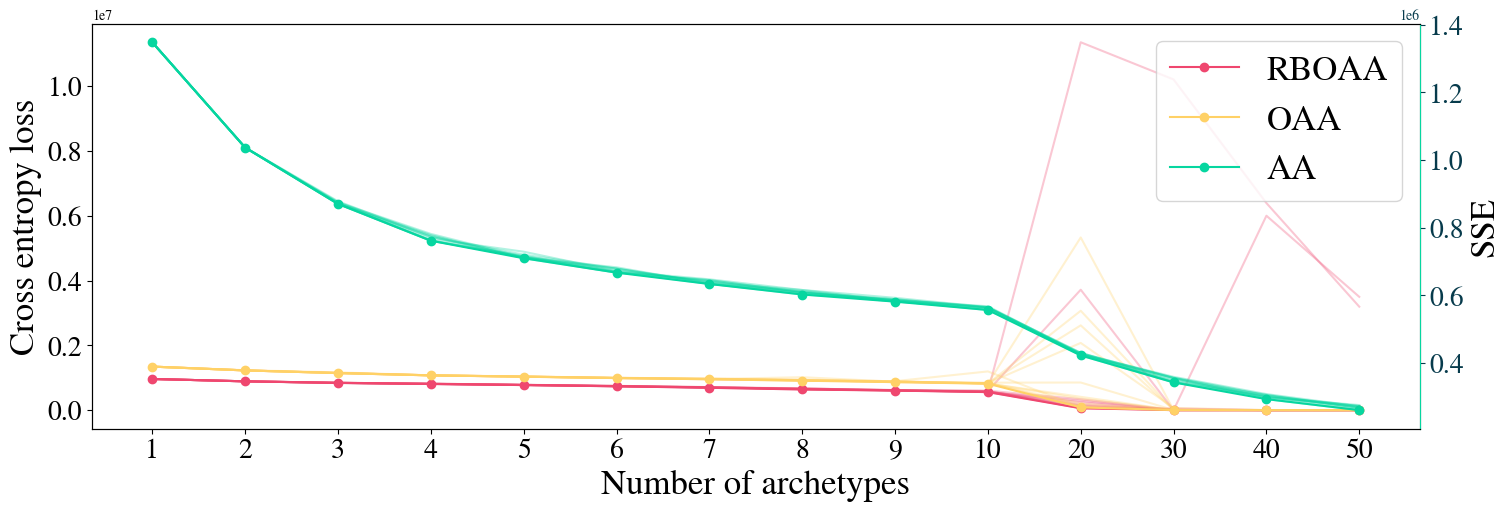

In [6]:
loss_archetype_plot(K_list=[1,2,3,4,5,6,7,8,9,10,20,30,40,50],
                    results_path='ESS8_All_AA_results.json',
                    results_path2=None
                    )

In [73]:
complex_corr = load_analyses('complex_corrupted_results')
len(complex_corr['RBOAA'])

14

In [74]:
complex_corr['RBOAA'].keys()

dict_keys(['K10', 'K1', 'K20', 'K2', 'K30', 'K3', 'K40', 'K4', 'K50', 'K5', 'K6', 'K7', 'K8', 'K9'])

In [53]:
os.listdir('synthetic_results/naive_corrupted_results/RBOAA_objects')

['RBOAA_K=10_rep=0',
 'RBOAA_K=10_rep=1',
 'RBOAA_K=10_rep=2',
 'RBOAA_K=10_rep=3',
 'RBOAA_K=10_rep=4',
 'RBOAA_K=10_rep=5',
 'RBOAA_K=10_rep=6',
 'RBOAA_K=10_rep=7',
 'RBOAA_K=10_rep=8',
 'RBOAA_K=10_rep=9',
 'RBOAA_K=1_rep=0',
 'RBOAA_K=1_rep=1',
 'RBOAA_K=1_rep=2',
 'RBOAA_K=1_rep=3',
 'RBOAA_K=1_rep=4',
 'RBOAA_K=1_rep=5',
 'RBOAA_K=1_rep=6',
 'RBOAA_K=1_rep=7',
 'RBOAA_K=1_rep=8',
 'RBOAA_K=1_rep=9',
 'RBOAA_K=20_rep=0',
 'RBOAA_K=20_rep=1',
 'RBOAA_K=20_rep=2',
 'RBOAA_K=20_rep=3',
 'RBOAA_K=20_rep=4',
 'RBOAA_K=20_rep=5',
 'RBOAA_K=20_rep=6',
 'RBOAA_K=20_rep=7',
 'RBOAA_K=20_rep=8',
 'RBOAA_K=20_rep=9',
 'RBOAA_K=2_rep=0',
 'RBOAA_K=2_rep=1',
 'RBOAA_K=2_rep=2',
 'RBOAA_K=2_rep=3',
 'RBOAA_K=2_rep=4',
 'RBOAA_K=2_rep=5',
 'RBOAA_K=2_rep=6',
 'RBOAA_K=2_rep=7',
 'RBOAA_K=2_rep=8',
 'RBOAA_K=2_rep=9',
 'RBOAA_K=30_rep=0',
 'RBOAA_K=30_rep=1',
 'RBOAA_K=30_rep=2',
 'RBOAA_K=30_rep=3',
 'RBOAA_K=30_rep=4',
 'RBOAA_K=30_rep=5',
 'RBOAA_K=30_rep=6',
 'RBOAA_K=30_rep=7',
 'RBOAA_K=30

In [60]:
import re
re.sub('[^0-9]', '', 'K=20')
# 'RBOAA_K=20_rep=0'.split('_')[1]

'20'

In [52]:
print('Example of extracting results')
print("A matrix (S): ", complex_corr['RBOAA']['K1'][0].A.shape)
print("B matrix (C): ", complex_corr['RBOAA']['K1'][0].B.shape)
print("archetype matrix: ", complex_corr['RBOAA']['K1'][0].Z.shape)
print("betas: ", complex_corr['RBOAA']['K1'][0].b.shape)

Example of extracting results
A matrix (S):  (1, 1000)
B matrix (C):  (1000, 1)
archetype matrix:  (20, 1)
betas:  (1000, 6)


In [29]:
complex_corr['CAA']['K0'][0].A

array([[2.92391883e-06, 9.68056270e-07, 2.98350733e-05, ...,
        1.22192898e-06, 8.57570626e-07, 1.20411607e-06],
       [5.02369119e-07, 6.59679301e-07, 9.05763898e-07, ...,
        2.95551331e-06, 1.22838856e-06, 3.95413764e-07],
       [1.35461528e-06, 4.35321954e-06, 1.96922383e-06, ...,
        6.36297613e-02, 5.02805449e-07, 6.93182374e-05],
       ...,
       [2.23997426e-06, 3.94997895e-01, 4.64582627e-06, ...,
        5.34586012e-02, 1.86042905e-06, 7.13271618e-07],
       [1.11571126e-01, 1.14502927e-06, 1.00055240e-05, ...,
        1.22106462e-06, 1.98472344e-06, 3.62871134e-07],
       [6.60232445e-06, 1.73802600e-05, 4.26272936e-06, ...,
        1.04532883e-04, 6.57081227e-06, 1.51987376e-06]], dtype=float32)

In [32]:
complex_corr['RBOAA']['K0'][0]